In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [105]:
df=pd.read_csv('diabetes.csv')

In [106]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [107]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [80]:
df.shape

(768, 9)

In [81]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [82]:
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,0,33.6,0.627,50,1
1,1,85,66,29.000000,0,26.6,0.351,31,0
2,8,183,64,20.536458,0,23.3,0.672,32,1
3,1,89,66,23.000000,94,28.1,0.167,21,0
4,0,137,40,35.000000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180,32.9,0.171,63,0
764,2,122,70,27.000000,0,36.8,0.340,27,0
765,5,121,72,23.000000,112,26.2,0.245,30,0
766,1,126,60,20.536458,0,30.1,0.349,47,1


In [83]:
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


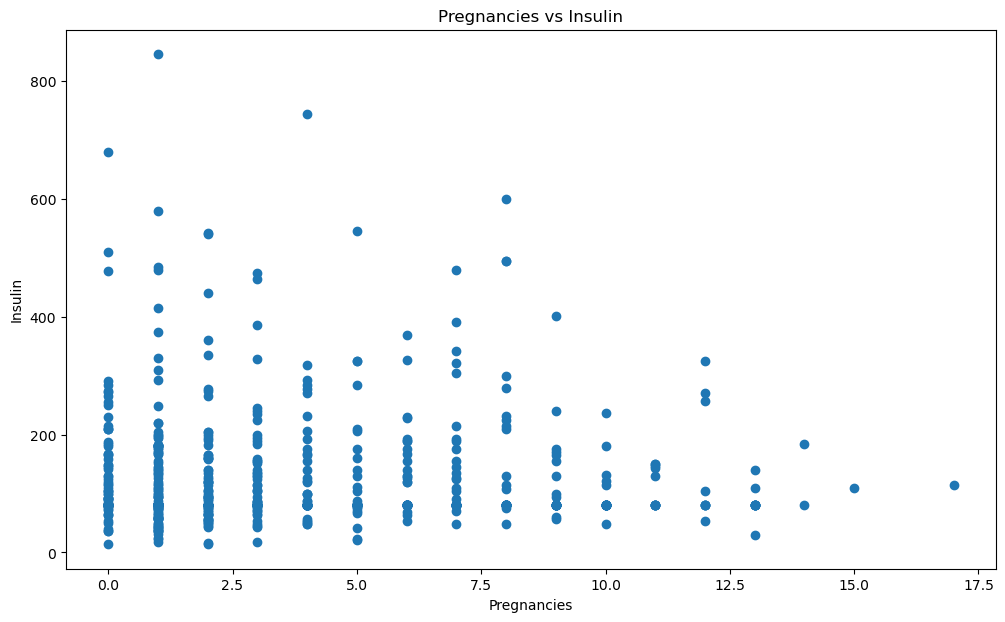

In [84]:
plt.figure(figsize=(12,7))
plt.scatter("Pregnancies","Insulin",data=df)
plt.title("Pregnancies vs Insulin")
plt.xlabel("Pregnancies")
plt.ylabel("Insulin")
plt.show()

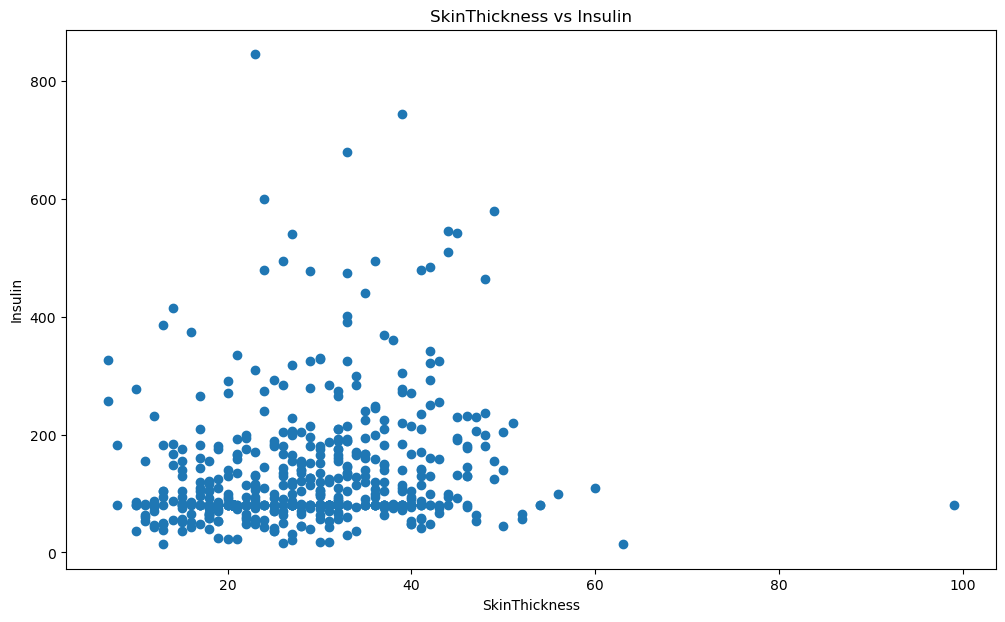

In [85]:
plt.figure(figsize=(12,7))
plt.scatter("SkinThickness","Insulin",data=df)
plt.title("SkinThickness vs Insulin")
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()

In [86]:
#To remove the Outliers
def remove_outlier (dataFrame):
    for column_name in dataFrame.columns:
        Q1=df[column_name].quantile(0.25)
        Q3=df[column_name].quantile(0.75)
        IQR=Q3-Q1
        lower_limit=Q1-1.5*IQR
        upper_limit=Q3+1.5*IQR
        print(f"{column_name}: \n Lower Limit: {lower_limit} \n Upper Limit: {upper_limit}")
        dataFrame = dataFrame[(dataFrame[column_name] > lower_limit)| (dataFrame[column_name] < upper_limit)]
    
    return dataFrame

In [87]:
df=remove_outlier(df)

Pregnancies: 
 Lower Limit: -6.5 
 Upper Limit: 13.5
Glucose: 
 Lower Limit: 37.125 
 Upper Limit: 202.125
BloodPressure: 
 Lower Limit: 35.0 
 Upper Limit: 107.0
SkinThickness: 
 Lower Limit: 3.341145833333332 
 Upper Limit: 49.1953125
Insulin: 
 Lower Limit: 8.623697916666671 
 Upper Limit: 198.42578125
BMI: 
 Lower Limit: 13.35 
 Upper Limit: 50.550000000000004
DiabetesPedigreeFunction: 
 Lower Limit: -0.32999999999999996 
 Upper Limit: 1.2
Age: 
 Lower Limit: -1.5 
 Upper Limit: 66.5
Outcome: 
 Lower Limit: -1.5 
 Upper Limit: 2.5


In [88]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [89]:
#Splitting the datas
from sklearn.model_selection import train_test_split
x=df.drop(["Outcome"],axis=1)
y=df["Outcome"]

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8, random_state=42)
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,20.536458,79.799479,0.0,0.304,21
618,9,112,82,24.000000,79.799479,28.2,1.282,50
346,1,139,46,19.000000,83.000000,28.7,0.654,22
294,0,161,50,20.536458,79.799479,21.9,0.254,65
231,6,134,80,37.000000,370.000000,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140.000000,28.6,0.411,26
106,1,96,122,20.536458,79.799479,22.4,0.207,27
270,10,101,86,37.000000,79.799479,45.6,1.136,38
435,0,141,0,20.536458,79.799479,42.4,0.205,29


In [91]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [92]:
x_train.shape

(614, 8)

In [93]:
x_test.shape

(154, 8)

In [94]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [95]:
logReg=LogisticRegression()

In [96]:
logReg.fit(x_train,y_train)

C:\Users\S.Ramya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
logReg.score(x_test,y_test)

0.7532467532467533

In [98]:
#LinearRegression
linearReg=LinearRegression()

In [99]:
linearReg.fit(x_train,y_train)

LinearRegression()

In [100]:
linearReg.score(x_test,y_test)

0.2586760188416003

In [101]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)

In [102]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

In [103]:
dt.score(x_train,y_train)

0.40328186716013226

In [104]:
dt.score(x_test,y_test)

0.2359826081685742